# Introduction

With this project, I will be analyzing employee salaries at a company based on the following factors: `Age`, `Gender`, `Education Level`, `Job Title`, and `Years of Experience`. The goal is to examine the data to find differences, correlation, and create visuals of these discoveries. 

For this project, I will be working with one data set acquired from [Kaggle](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer) to provide answers to the goals and questions below. 

#### Questions and Goals

* Calculate summary statistics and distribution of salary within the company. 
* Find the distribution of age, education level, and years of experience of employees at the company. 
* How do salaries compare based on gender?
* What is the difference in salary based on education level?
* What are the 10 job titles within the company with the highest average salaries?
* How does years of experience and salary correlate with one another?
* Are there differences in salary based on gender and education level?

## Getting Started

I will first begin by importing the necessary libraries that will be used throughout this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, I will load the `Salary Data.csv` file into a data frame called `df`, and call to view the first five rows of data using the `.head()` function. 

In [2]:
df = pd.read_csv('Salary Data.csv')

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Exploring and Cleaning the Data

There are a total of (6) columns within the data frame, and they are as follows:

* `Age`: This column represents the age of each employee in years. The values in this column are numeric.
* `Gender`: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.
* `Education Level`: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.
* `Job Title`: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.
* `Years of Experience`: This column represents the number of years of work experience of each employee. The values in this column are numeric.
* `Salary`: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

Using the `.info()` method, I will be looking to gather more information on the columns such as data type, non-null values, and the lenghth of the data. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Of the 375 entries of rows of data, there appears to be 2 rows that contain null values. More information will be gathered to determine how to deal with these null values. 

After reviewing the 2 rows of null values, these rows contain missing values for each of the columns, and in turn provide no value to the analysis. I will be removing these 2 rows using the `.dropna()` methond. 

In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df[df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)

df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

The next few steps will be further exploration of the information within this data set. Next, I will be using the `.describe()` method to gather descriptive statistics such as the `mean` (average), `min` (minimum), and `max` (maximum) values for the numerical columns of the data set. I will also use `unique()` and `nunique()` methods to get a view of the values used within a couple of the columns while also getting a count of the unique values used within the `Job Title` column. 

In [7]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [8]:
print(df['Gender'].unique())

['Male' 'Female']


In [9]:
print(df['Education Level'].unique())

["Bachelor's" "Master's" 'PhD']


In [10]:
print(df['Job Title'].nunique())

174


## Descriptive Statistics

Now that I've cleaned and explored the data set, it's time to begin my analysis. The first goal is to get a distribution of the `Salary` column. I will plot the distribution of salaries using a histogram. This is usefull in quantifying, or viewing the frequency, of the range of salaries within the data set.

The salaries that appear most frequently range between `$30,000-$50,000`, with the third most frequent salaries ranging between `$90,000-$100,000` annually. The average (`mean`) salary within the data set is just over `$100,000`, and the highest salary within this data set maxes out at `$250,000`. Based on the shape of the histogram, it is non-symmetric and multimodal. . 

Mean Salary:  100577.35
Median Salary:  95000.0
Standard Deviation:  48240.01


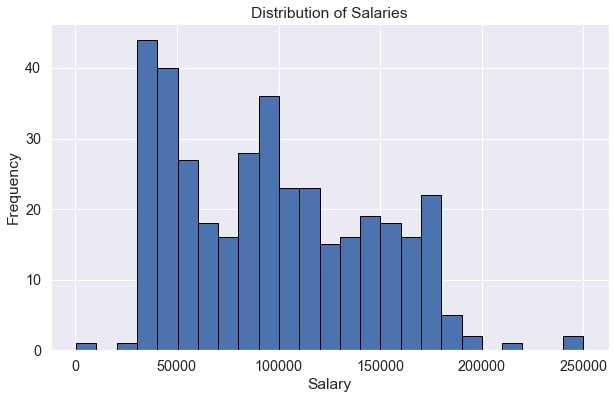

<Figure size 432x288 with 0 Axes>

In [11]:
# Separate the salary column into its own variable
salary_column = df['Salary']

# Calculate descriptive statistics
mean_salary = round(salary_column.mean(), 2)
median_salary = round(salary_column.median(), 2)
std_salary = round(salary_column.std(), 2)

# Print the calculated values
print('Mean Salary: ', mean_salary)
print('Median Salary: ', median_salary)
print('Standard Deviation: ', std_salary)

# Create a histogram to visualize the distribution of salary
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
plt.hist(salary_column, bins=25, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()
plt.clf()

#### Age

Next I will be looking at the distribution of age of the employees using a histogram as well. First, the shape of the histogram is very random with no real consistency at all. The youngest (`min`) age is 23 years, and the eldest (`max`) age is 53 years. This tells me there is a range of 30 years between the youngest and eldest employees at this company. The average (`mean`) age is just about 37.4 years. 

Mean Age:  37.43163538873995
Median Age:  36.0
Standard Deviation:  7.069072938567496
Minimum Age:  23.0
Maximum Age:  53.0


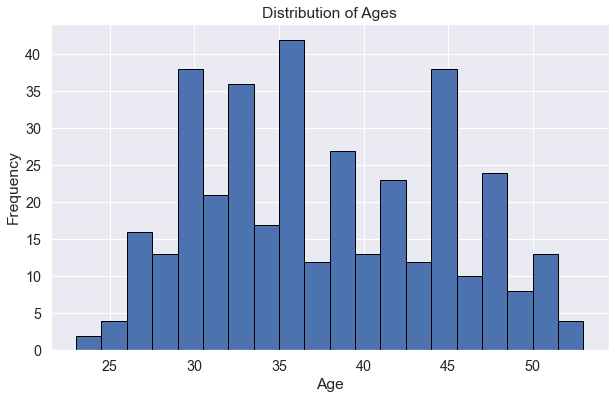

<Figure size 432x288 with 0 Axes>

In [12]:
# Separate the age column into its own variable
age_column = df['Age']

# Calculate descriptive statistics
mean_age = age_column.mean()
median_age = age_column.median()
std_age = age_column.std()
min_age = age_column.min()
max_age = age_column.max()

# Print the calculated values
print("Mean Age: ", mean_age)
print("Median Age: ", median_age)
print("Standard Deviation: ", std_age)
print("Minimum Age: ", min_age)
print("Maximum Age: ", max_age)

# Create a histogram to visualize the distribution of ages
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
plt.hist(age_column, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()
plt.clf()

#### Education Level

Within this company, each employee maintains a `Bachelor's` degree level of education or higher. Just over `60%` of employees have a `Bachelor's` degree, while `26.3%` received their `Master's` degree, and `13.7%` of employees received a `PhD` level of education. 

Education Level Counts:
Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64


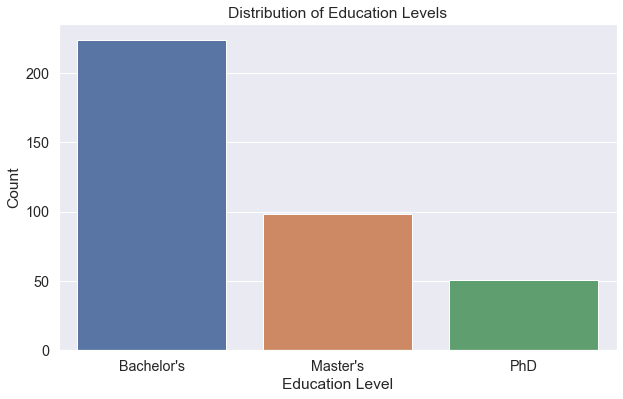

<Figure size 432x288 with 0 Axes>

In [13]:
# Separate the education level column into its own variable
education_column = df['Education Level']

# Count the number of employees in each education level category
education_counts = education_column.value_counts()

# Print the count of employees in each education level category
print("Education Level Counts:")
print(education_counts)

# Visualize the distribution using a bar chart
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()
plt.clf()


Education Level Proportions:
Bachelor's    0.600536
Master's      0.262735
PhD           0.136729
Name: Education Level, dtype: float64


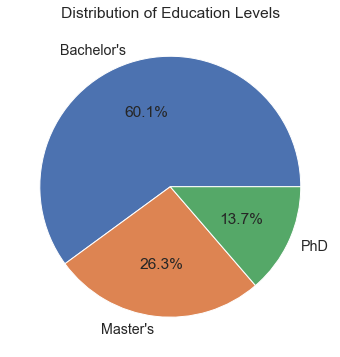

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate the proportion or percentage of employees in each education level category
education_proportions = education_column.value_counts(normalize=True)

# Print the proportion of employees in each education level category
print("\nEducation Level Proportions:")
print(education_proportions)

# Visualize the distribution using a pie chart
plt.figure(figsize=(10,6))
education_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Education Levels')
plt.show()
plt.clf()

#### Years of Experience

The average (`mean`) amount of years of experience within this company is just over `10` years. `Years of experience` ranges from `0-25` years within the company. The histogram displays a random shape with no clear pattern at all, with the most frequent amount of `years of experience` being between `1-3` years. 

Mean Experience:  10.03083109919571
Median Experience:  9.0
Standard Deviation:  6.557007136414243
Minimum Experience:  0.0
Maximum Experience:  25.0


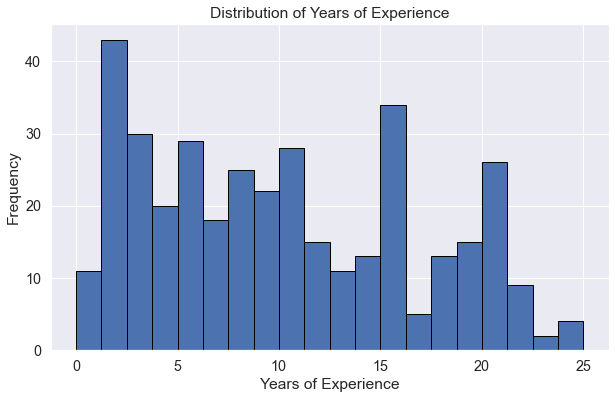

<Figure size 432x288 with 0 Axes>

In [15]:
# Separate the years of experience column into its own variable
experience_column = df['Years of Experience']

# Calculate descriptive statistics
mean_experience = experience_column.mean()
median_experience = experience_column.median()
std_experience = experience_column.std()
min_experience = experience_column.min()
max_experience = experience_column.max()

# Print the calculated values
print("Mean Experience: ", mean_experience)
print("Median Experience: ", median_experience)
print("Standard Deviation: ", std_experience)
print("Minimum Experience: ", min_experience)
print("Maximum Experience: ", max_experience)

# Create a histogram to visualize the distribution of ages
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
plt.hist(experience_column, bins=20, edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.show()
plt.clf()

## Further Analysis

In the United States, women who work full-time, year-round, are paid an average of [83.7% as much as men](https://www.dol.gov/newsroom/releases/osec/osec20230314) in 2023, with pay gaps even larger for many women of color and women with disabilities. 

Within this company, the gender pay gap is prevalent with women earning, on average, `93.4%` of what their male counterparts earn, amounting to a difference of `$6,856.61`. 

Average Salary by Gender:
Gender
Female     97011.173184
Male      103867.783505
Name: Salary, dtype: float64 

On average, female employees earn 93.4% of what their male counterparts earn.
The total dollar amount difference is $6856.61.


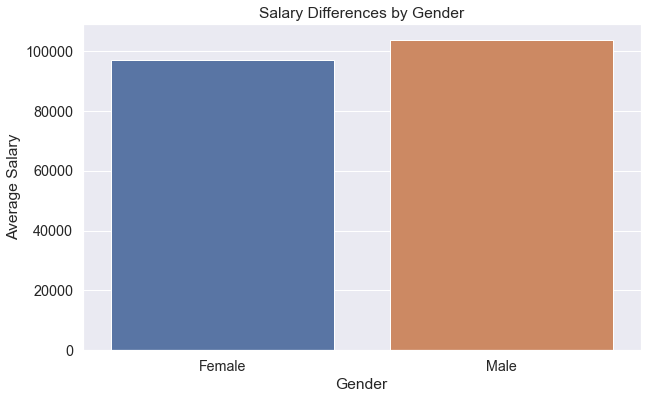

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the average salary for each gender
gender_salary_mean = df.groupby('Gender')['Salary'].mean()

# Calculate the percentage and dollar amount difference
percent_diff = ((gender_salary_mean['Female'] / gender_salary_mean['Male'])*100).round(2)
total_diff = (gender_salary_mean['Male'] - gender_salary_mean['Female']).round(2)

# Print the average salary for each gender
print('Average Salary by Gender:')
print(gender_salary_mean, '\n')
print(f'On average, female employees earn {percent_diff}% of what their male counterparts earn.')
print(f'The total dollar amount difference is ${total_diff}.')

# Visualize the salary differences between male and female employees
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
sns.barplot(x=gender_salary_mean.index, y=gender_salary_mean.values)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Salary Differences by Gender')
plt.show()
plt.clf()

#### Education Level Salary Differences

It should be fairly obvious that `education level` would play a major factor in differences in salary. Within this company, the average salary for an employee with a `Bachelor's` level of education is `$74,756`. For an employee that received their `Master's` degree, the average salary is `$129,796`. Lastly, for an employee that has recieved their `PhD`, the average salary is `$157,843`. The employees that have earned their `Master's` degrees receive over `$50,000` more annually than those that have earned their `Bachelor's`, whereas, employees that have earned a `PhD` receive just over `$28,000` more annually than those that have earned their `Master's` degree. It is quite a pay gap between employees with a `Bachelor's` degree `level of education` compared to those with a `Master's` degree!

Average Salary by Education Level:
Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64


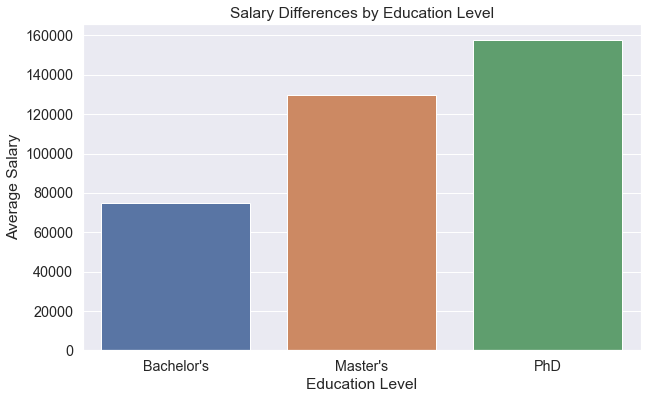

<Figure size 432x288 with 0 Axes>

In [17]:
# Calculate the average salary for each education level
education_salary_mean = df.groupby('Education Level')['Salary'].mean()

# Print the average salary for each education level
print("Average Salary by Education Level:")
print(education_salary_mean)

# Visualize the salary differences between each education level
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
sns.barplot(x=education_salary_mean.index, y=education_salary_mean.values)
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Salary Differences by Education Level')
plt.show()
plt.clf()

#### Job Titles with Highest Salaries

Within the company data set, it's not suprising to find that the top 10 jobs with the highest salaries all belong to directors or officers of some sort within the company. What I do find surprising is that along with the `CEO`, the `Chief Technology Officer` is also receiving a salary of `$250,000`, making up the top 2 salaries within the company. The third highest salary within the company belongs to the `Chief Data Officer` coming in at about `$220,000`. 

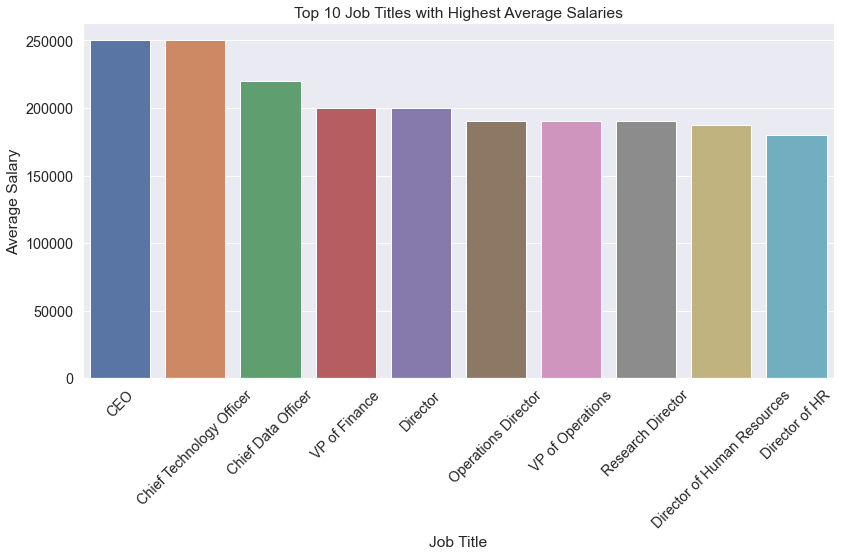

<Figure size 432x288 with 0 Axes>

In [18]:
# Calculate the average salary for each job title
job_title_salary_mean = df.groupby('Job Title')['Salary'].mean()

# Sort job titles by average salary in descending order
job_title_salary_mean = job_title_salary_mean.sort_values(ascending=False)

# Select the top 10 job titles with highest average salaries
top_average_salary = job_title_salary_mean.head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.3)
sns.barplot(x=top_average_salary.index, y=top_average_salary.values)
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Top 10 Job Titles with Highest Average Salaries')
plt.tight_layout()
plt.show()
plt.clf()

#### Years of Experience and Salary Correlation

The next step of the project is to examine the correlation between `years of experience` and `salary`. It's safe to say that, generally, the longer that an employee has been with a company, the higher their salary will be with the company. When examining the correlation coefficient, it proved just that. With a correlation coefficient of `0.93`, it shows a strong linear correlation between the two variables. As `years of experience` increases, so does `salary`. Another thing I observed within the data set is that as `education level` increases, so does `salary`. As employees length of employment within the company increases, do they tend to also go back to school and further their education? Maybe the company provides some type of compensation to assist with paying for the employees schooling? There could be something further to examine here. 

Correlation Coefficient:  0.9303377227618356


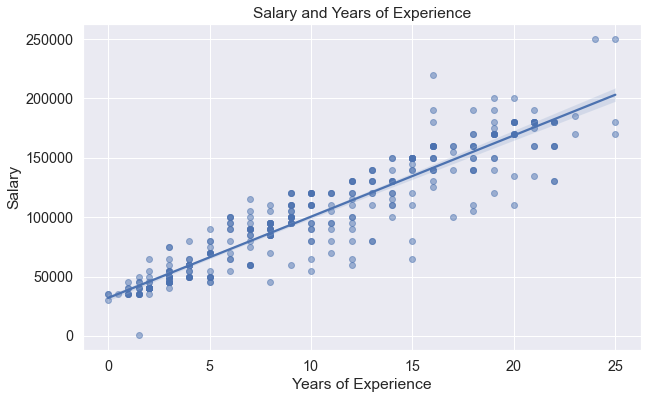

<Figure size 432x288 with 0 Axes>

In [19]:
# Separate the years of experience and salary column into their own separate variables
experience_column = df['Years of Experience']
salary_column = df['Salary']

# Create a DataFrame with years of experience and salary
experience_salary = pd.DataFrame({'Years of Experience': experience_column, 'Salary': salary_column})

# Calculate the correlation coefficient
correlation_coefficient = experience_salary['Years of Experience'].corr(experience_salary['Salary'])

# Print the correlation coefficient
print("Correlation Coefficient: ", correlation_coefficient)

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
sns.regplot(x=experience_column, y=salary_column, scatter_kws={'alpha':0.5})
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary and Years of Experience')
plt.show()
plt.clf()

#### Gender and Education Level Salary Differences

Previously, within this project, I examined the gender pay gap as a whole within this company data set. This next step was to take it a little further, and examine the gender pay gap based on `education level` as well. Once again, the gender pay gap within this data set was `$6,856.61`. The biggest surprise here comes with the `Master's` degree level of education. A `male` employee with a `Master's` degree earns over `$19,000` more than a `female` employee with the same `education level` on average. This is about 3x more than the gender pay gap as a whole within the company overall. What can be leading to this level of a difference, and what can be done to close this gap?

Education Level    Bachelor's       Master's            PhD
Gender                                                     
Female           71019.417476  120200.000000  155384.615385
Male             77936.776860  139791.666667  160400.000000


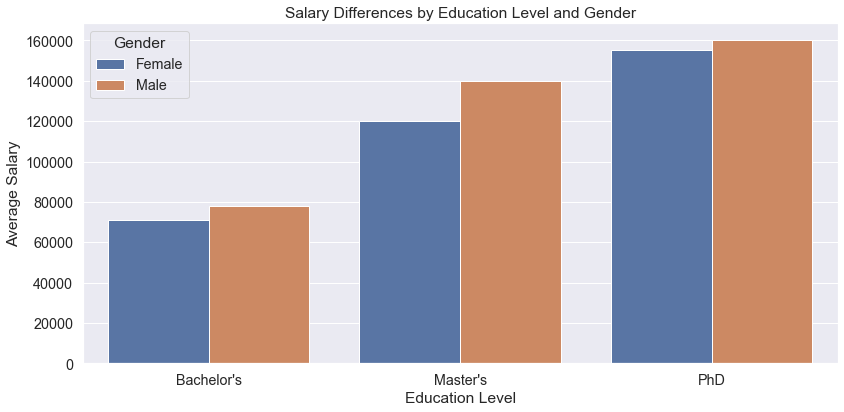

<Figure size 432x288 with 0 Axes>

In [20]:
# Calculate the average salary for each gender by education level
gender_education = df.groupby(['Gender', 'Education Level'])['Salary'].mean().reset_index()

# Print the differences in salary by gender and education level
print(df.groupby(['Gender', 'Education Level'])['Salary'].mean().unstack())

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(font_scale=1.3)
sns.barplot(x=gender_education['Education Level'], y=gender_education['Salary'], hue=gender_education['Gender'])
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Salary Differences by Education Level and Gender')
plt.tight_layout()
plt.show()
plt.clf()

To evaluate the large pay gap between `female` and `male` employees with `Master's` degrees, their salaries are spread out over multiple histograms. What jumps out first to me is the large amount of `male` employees that have a salary of `$170,000`. The second observation I make is the amount of `female` employees that have a salary under `$100,000`. The lowest salary for `female` employees with a `Master's` degree is `$40,000`, and the lowest salary for `male` employees with a `Master's` degree is `$75,000`. Lastly, the highest `female` employee salary maxes out at `$190,000`, whereas, there are four `male` employees with salaries of `$190,000` or higher. All these factors help to explain why there is such a large gap in salaries between `female` and `male` employees who have received their `Master's` degree. 

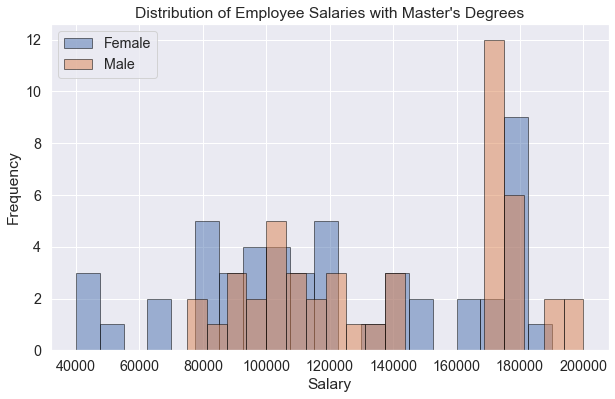

<Figure size 432x288 with 0 Axes>

In [21]:
# Filter data for males and females with Master's degrees
male_salary = df[(df['Gender'] == 'Male') & (df['Education Level'] == "Master's")]
female_salary = df[(df['Gender'] == 'Female') & (df['Education Level'] == "Master's")]

# Create a histogram to visualize the distribution of salary
plt.figure(figsize=(10,6))
sns.set(font_scale=1.3)
plt.hist(female_salary['Salary'], bins=20, edgecolor='black', alpha=0.5, label='Female')
plt.hist(male_salary['Salary'], bins=20, edgecolor='black', alpha=0.5, label='Male')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title("Distribution of Employee Salaries with Master's Degrees")
plt.legend()
plt.show()
plt.clf()

## Conclusion

In the end, after evaluating the data set of employee salaries at a company, many observations and visuals were able to be made that provided answers to the questions originally discussed and meet the goals that were set. 

1. Calculate summary statistics and distribution of salary within the company.
    * In evaluating the summart statistics and distribution of salary, it was quite clear that a large amount of employees had salaries in the range of `$30,000-$50,000`. The average salary within the company was just over `$100,000`, and the highest salary was `$250,000`. 
2. Find the distribution of age, education level, and years of experience of employees at the company.
    * Within the data set, there was a range of 30 years of age between the employees, with the youngest employee being 23 years old, and the oldest being 53 years old. Employees at the company had either a Bachelor's degree, Master's degree, or a PhD. As for years of experience, employees ranges between 0-25 years with the company.
3. How do salaries compare based on gender?
    * As with many companies, there is a gender pay gap in the data set. On average, female employees earned `93.4%` of what male employees earned, with the gender pay gap being `$6,856.61`.
4. What is the difference in salary based on education level?
    * When it came to education level, employees who earned their Master's degree received over `$50,000` more annually than employees who earned their Bachelor's degree, whereas, employees that have earned a PhD receive just over `$28,000` more annually than those who earned their Master's degree.
5. What are the 10 job titles within the company with the highest average salaries?
    * Of the highest earning salaries within the company, all had either Director or Officer in their job title. Surprisingly, the Chief Technology Officer recieved a salary equal to the CEO. 
6. How does years of experience and salary correlate with one another?
    * There is a strong positive correlation between years of experience and salary within the company. 
7. Are there differences in salary based on gender and education level?
    * Yes, as previously discussed, there is a gender pay gap between employees within the data set. In reviewing the difference in pay between gender and education level, the largest discrepancy came between male and female employees who earned their Master's degree. Males employees who earned their Master's averaged to earn over `$19,000` more than female employees who earned their Master's degree within the data set. When comparing salaries of male and female employees who earned their Bachelor's degree and PhD, the difference was not as drastic as with those who earned their Master's. The pay gaps were much closer to the gender pay gap within the company, though, this doesn't make pay gaps justifiable in any way. 